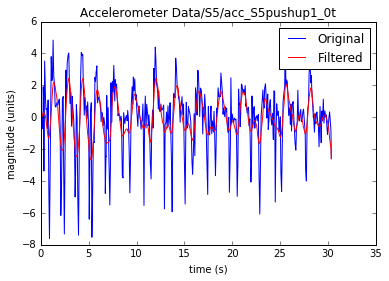

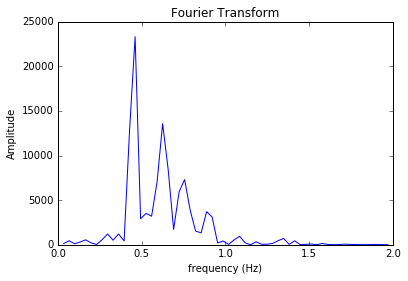

Pushups + Counts: 13.9675174014


In [1]:
import urllib
import matplotlib.pyplot as plt
import csv
import sys
from math import *
from matplotlib import *
import numpy as np
from scipy import *
import scipy.signal as signal
import scipy.ndimage as ndimage
from matplotlib.mlab import PCA

%matplotlib inline

# File name
action = 'Accelerometer Data/S5/acc_S5pushup1_0t'
file_name = action + '.csv'
csv_reader = csv.reader(open(file_name))

verts = []
# Get data from CSV file
for row in csv_reader:
    verts.append(row)

time = []
mag = []

# Get and convert to magnitude of acceleration
for vert in verts:
    time.append(float(vert[0])-float(verts[0][0]))
    mag.append(sqrt(float(vert[1])**2 + float(vert[2])**2 + float(vert[3])**2))

mag= signal.detrend(mag)
    
#Butterworth Filter
N = 2 #Filter order
fs = (len(mag)-1)/time[len(time)-1]
Wn = 0.01*fs #Cutoff frequency
B, A = signal.butter(N, Wn, output='ba')

magf = signal.filtfilt(B,A, mag)
    
# Plot data
plt.plot(time, mag)
plt.plot(time, magf,'r-')

plt.xlabel('time (s)')
plt.ylabel('magnitude (units)')
plt.legend(['Original', 'Filtered'])
plt.title(action)

plt.show()

# Fourier Transform
magfft=np.fft.fft(magf, n=None, axis=-1)
Ps=np.abs(magfft)**2

time_step = time[len(time)-1]/(len(magfft)-1)
freqs = np.fft.fftfreq(len(mag), time_step)
idx = np.argsort(freqs)
idxx = np.argsort(Ps[idx])

freqsIdx = freqs[idx]
psIdx = Ps[idx]
freqsPos = []
psPos = []
i = 0
while (i < len(freqsIdx)):
    if freqsIdx[i] > 0 and freqsIdx [i] < 2:
        freqsPos.append(freqsIdx[i])
        psPos.append(psIdx[i])
    i = i + 1


plt.plot(freqsPos, psPos)

plt.xlabel('frequency (Hz)')
plt.ylabel('Amplitude')
plt.title("Fourier Transform")
# Save file
directory = "C:/Users/Student.121-GMASTER/Box Sync/Junior/SIR/Figures"
savepath = os.path.join(directory, "Fourier Graph.svg")
plt.savefig(savepath)

plt.show()

# Print count from Fourier Transform
print ("Pushups + Counts: " + str((time[len(time)-1]*np.abs(freqs[idx][idxx[len(idxx)-1]]))))

In [21]:
freqs[idx][idxx[len(idxx)-1]]

-0.096959007693812688

In [13]:
time[len(time)-1]

30.872

In [14]:
len(mag)

449

In [15]:
time[len(time)-1]

30.872

In [16]:
magfftAbs[idx][238]

NameError: name 'magfftAbs' is not defined

In [17]:
freqs[idx][238]

0.45247536923779252

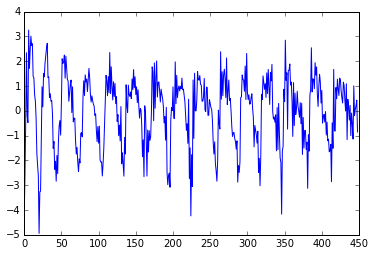

In [18]:
plt.plot(mag)

In [19]:
time[len(time)-10]

30.229999999999997